<a href="https://colab.research.google.com/github/SHsabbir25/Burn_Severity_Analysis/blob/main/06_mapping_gridded_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

In this section, we will take the [Gridded Monthly Temperature Anomaly Data](https://data.giss.nasa.gov/gistemp/) from 1880-present from GISTEMP and visualize the temperature anomaly for any year.

## Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [1]:
%%capture
if 'google.colab' in str(get_ipython()):
  !pip install cartopy netCDF4

In [2]:
import cartopy
import cartopy.crs as ccrs
import os
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [4]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

filename = 'gistemp1200_GHCNv4_ERSSTv5.nc'

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/gistemp/'

download(data_url + filename)

Downloaded data/gistemp1200_GHCNv4_ERSSTv5.nc


## Data Pre-Processing

We read the data using `XArray` and select the `tempanomaly` variable.

In [5]:
file_path = os.path.join(data_folder, filename)
ds = xr.open_dataset(file_path)
da = ds.tempanomaly
da

<xarray.DataArray 'tempanomaly' (time: 1733, lat: 90, lon: 180)> Size: 112MB
[28074600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2024-05-15
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

We have monthly anomalies from 1880-present. Let's aggregate it to mean yealy anomalies.

In [6]:
yearly = da.groupby('time.year').mean(dim='time')
yearly

<xarray.DataArray 'tempanomaly' (year: 145, lat: 90, lon: 180)> Size: 9MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
          3.6616666 ,  3.6616666 ],
        [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
          3.6616666 ,  3.6616666 ],
        [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
          3.6616666 ,  3.6616666 ]],

       [[-0.748     , -0.748     , -0.748     , ..., -0.748     ,
         -0.748     , -0.748     ],
        [-0.748     , -0.748     , -0.748     , ..., -0.748     ,
         -0.748     , -0.748     ],
        [-0.748     , -0.748     , -0.748     , ..., -0.748     ,
         -0.748     , -0.748     ],
        ...,
        [ 4.4999995 ,  4.4999995 ,  4.4999995 , ...,  4.4999995 ,
          4.4999995 ,  4.4999995 ],
        [ 4.4999995 ,  4.4999995 ,  4.4999995 , ...,  4.4999995 ,
          4.4999995 ,  4.4999995 ],
        [ 4.4999995 ,  4.4999995 ,  4.4999995 , ...,  4.4999995 ,
          4.4999995 ,  4.4999995 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * year     (year) int64 1kB 1880 1881 1882 1883 1884 ... 2021 2022 2023 2024
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

## Plotting using Matplotlib


Let's extract the data for one of the years.

In [7]:
year = 2023

We can use the `.sel()` method to query using the value of the `year` dimension.

In [8]:
anomaly = yearly.sel(year=year)
anomaly

<xarray.DataArray 'tempanomaly' (lat: 90, lon: 180)> Size: 65kB
array([[-0.10916665, -0.10916665, -0.10916665, ..., -0.10916665,
        -0.10916665, -0.10916665],
       [-0.10916665, -0.10916665, -0.10916665, ..., -0.10916665,
        -0.10916665, -0.10916665],
       [-0.10916665, -0.10916665, -0.10916665, ..., -0.10916665,
        -0.10916665, -0.10916665],
       ...,
       [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
         3.6616666 ,  3.6616666 ],
       [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
         3.6616666 ,  3.6616666 ],
       [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
         3.6616666 ,  3.6616666 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
    year     int64 8B 2023
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

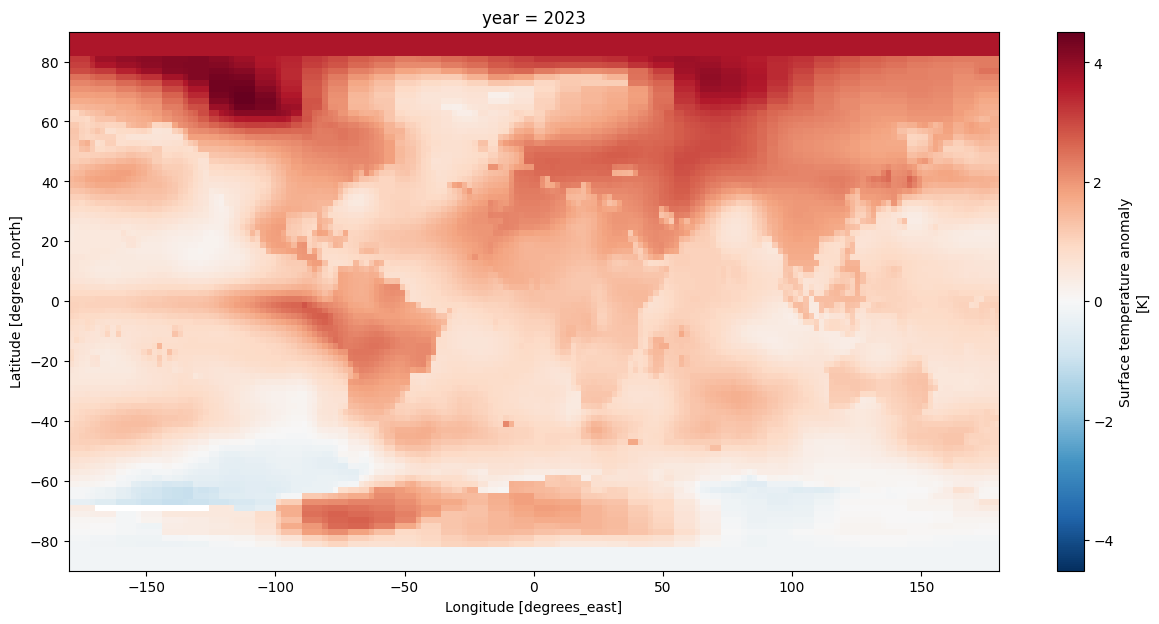

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
anomaly.plot.imshow(ax=ax)
plt.show()

We can customize the plot using Matplotlib's options.

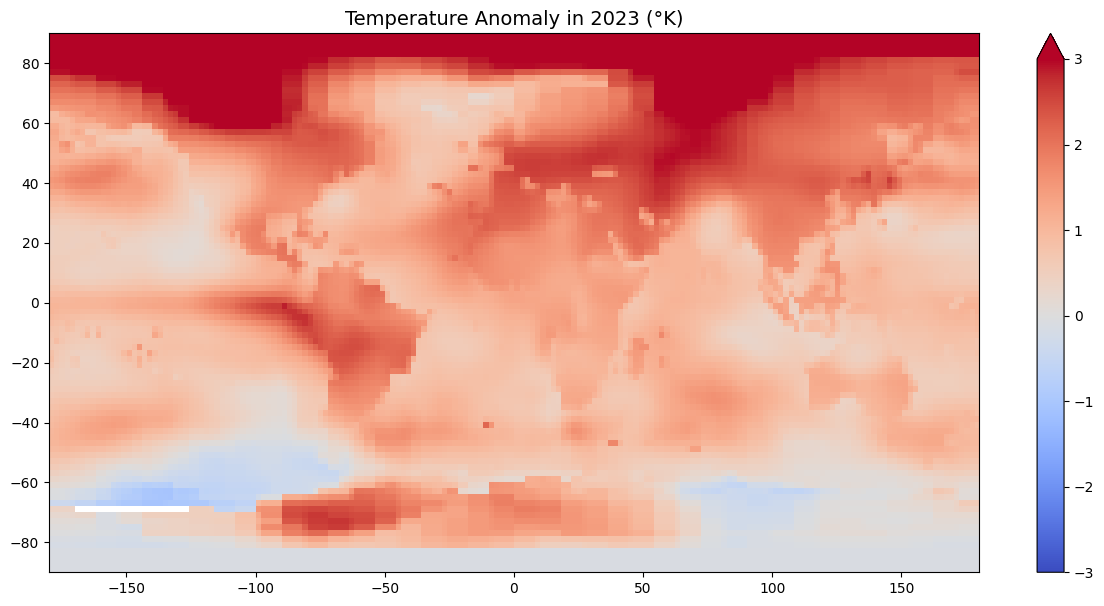

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)

anomaly.plot.imshow(ax=ax,
    vmin=-3, vmax=3, add_labels=False, cmap='coolwarm')

ax.set_title(f'Temperature Anomaly in {year} (°K)', fontsize = 14)

plt.show()

## Plotting using CartoPy

To create more informative map visualization, we need to reproject this grid to another projection. CartoPy supports a wide range of projections and can plot them using matplotlib. CartoPy creates a GeoAxes object and replaces the default Axes with it. This allows you to plot the data on a specified projection.

We start as usual by create a subplot but specify an additional argument to set the CRS from CartoPy.

Reference: [CartoPy List of Projections](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html?highlight=list#list-of-projections)

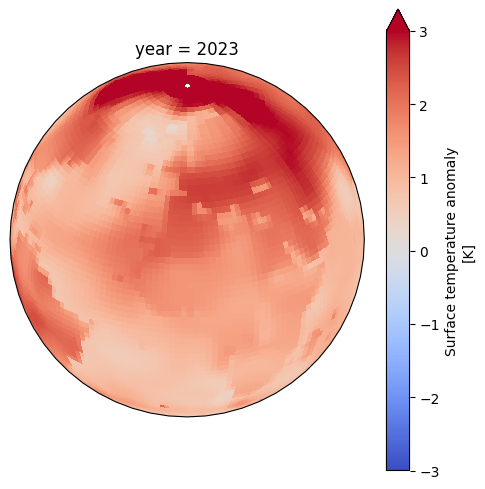

In [11]:
projection = ccrs.Orthographic(0, 30)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
fig.set_size_inches(5,5)

anomaly.plot.imshow(ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()

We can further customize the map by adjusting the colorbar.

Reference: [matplotlib.pyplot.colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


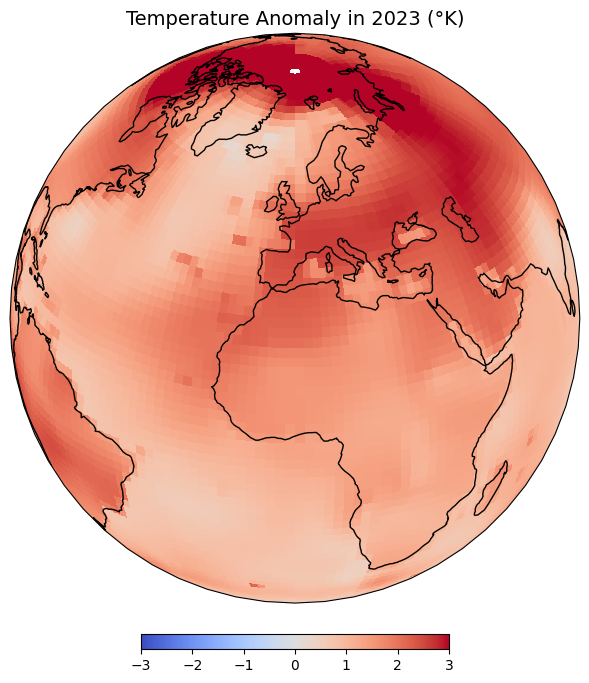

In [12]:
projection = ccrs.Orthographic(0, 30)

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
fig.set_size_inches(8, 8)
anomaly.plot.imshow(
    ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs)

ax.coastlines()
plt.title(f'Temperature Anomaly in {year} (°K)', fontsize = 14)

output_folder = 'output'
output_path = os.path.join(output_folder, 'anomaly.jpg')
plt.savefig(output_path, dpi=300)
plt.show()

## Exercise

Display the map in the Equal Earth projection.

<img src='https://courses.spatialthoughts.com/images/python_dataviz/anomaly.png' width=400/>

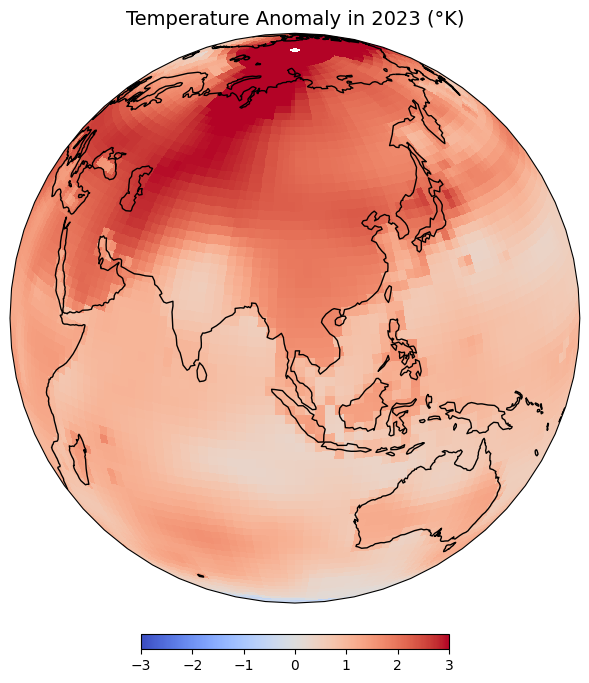

In [13]:
# Rotated Orthographic projection
projection = ccrs.Orthographic(central_longitude=100, central_latitude=20)  # Adjust to your desired center

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
fig.set_size_inches(8, 8)
anomaly.plot.imshow(
    ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs)

ax.coastlines()
plt.title(f'Temperature Anomaly in {year} (°K)', fontsize = 14)

output_path = os.path.join(output_folder, 'anomaly_rotated.jpg')
plt.savefig(output_path, dpi=300)
plt.show()


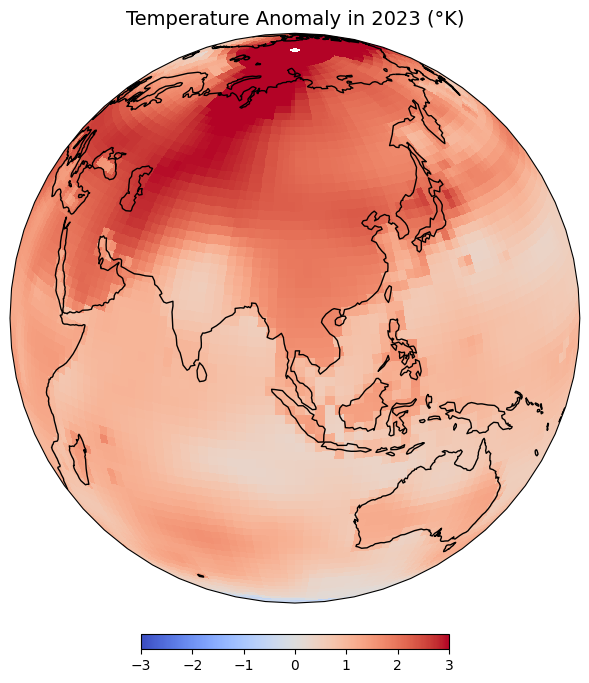

In [14]:
# Install required packages if using Google Colab
# !pip install cartopy netCDF4

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os
import xarray as xr

# Folders and filename
data_folder = 'data'
output_folder = 'output'
filename = 'gistemp1200_GHCNv4_ERSSTv5.nc'
file_path = os.path.join(data_folder, filename)

# Load data
ds = xr.open_dataset(file_path)
da = ds.tempanomaly
yearly = da.groupby('time.year').mean(dim='time')
year = 2023
anomaly = yearly.sel(year=year)

# Set rotated projection
projection = ccrs.Orthographic(central_longitude=100, central_latitude=20)

# Colorbar configuration
cbar_kwargs = {
    'orientation': 'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend': 'neither'
}

# Plot
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
fig.set_size_inches(8, 8)

anomaly.plot.imshow(
    ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs
)

ax.coastlines()
plt.title(f'Temperature Anomaly in {year} (°K)', fontsize=14)

# Save output
if not os.path.exists(output_folder):
    os.mkdir(output_folder)
output_path = os.path.join(output_folder, 'anomaly_rotated.jpg')
plt.savefig(output_path, dpi=300)
plt.show()


Saved rotated anomaly map to: output/anomaly_rotated.jpg


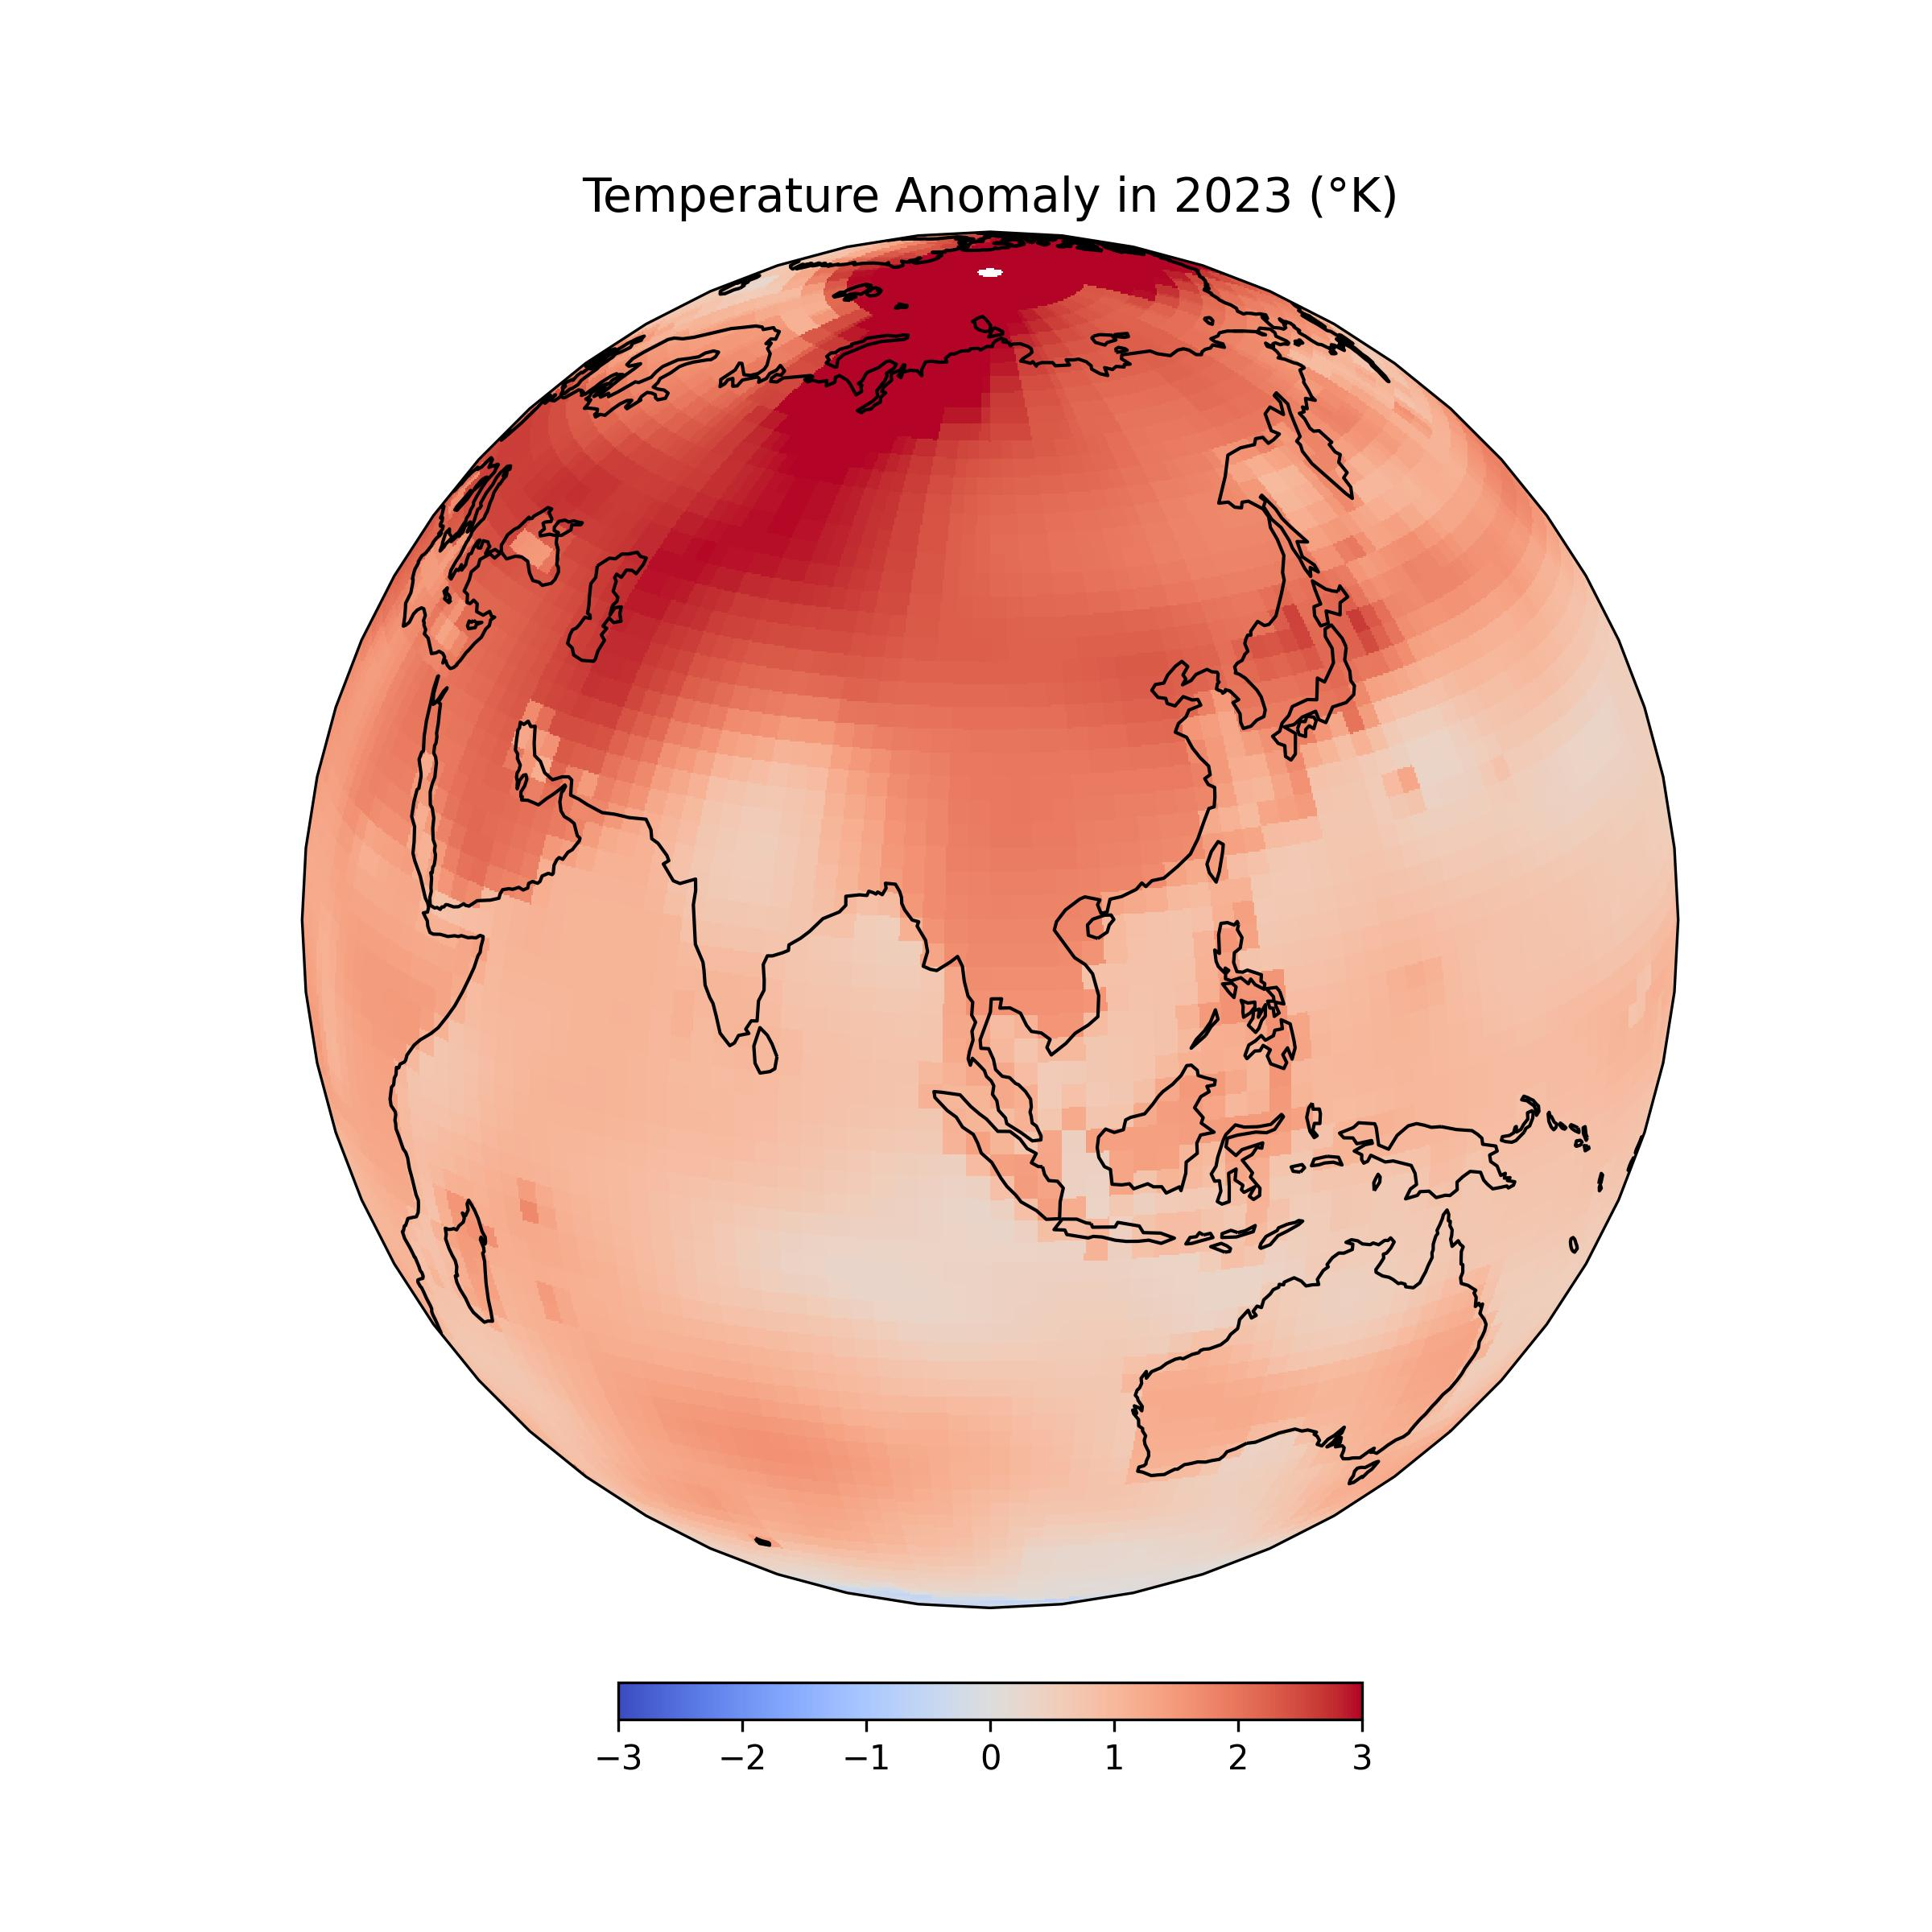

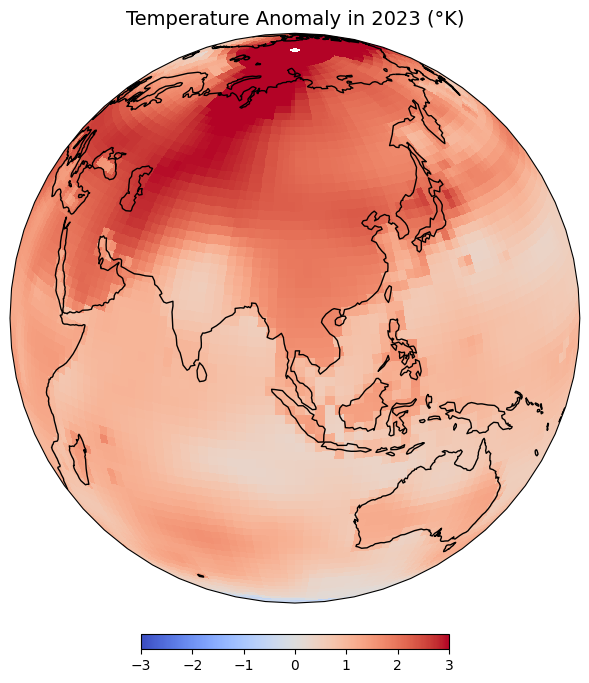

In [17]:
# ✅ Use rotated globe projection here
projection = ccrs.Orthographic(central_longitude=100, central_latitude=20)  # Center over Asia

cbar_kwargs = {
    'orientation': 'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend': 'neither'
}

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
fig.set_size_inches(8, 8)

anomaly.plot.imshow(
    ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs
)

ax.coastlines()
plt.title(f'Temperature Anomaly in {year} (°K)', fontsize=14)

output_path = os.path.join(output_folder, 'anomaly_rotated.jpg')
plt.savefig(output_path, dpi=300)

# Optional: show file saved path
print(f"Saved rotated anomaly map to: {output_path}")

# Optional: Display image in notebook
from IPython.display import Image, display
display(Image(filename=output_path))


In [19]:
import imageio
from tqdm import tqdm  # optional for progress bar

# Create frames for rotating globe
frame_folder = os.path.join(output_folder, 'frames')
os.makedirs(frame_folder, exist_ok=True)

# Settings
step = 10  # degrees to rotate each frame
frame_paths = []

for lon in tqdm(range(0, 360, step)):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic(central_longitude=lon, central_latitude=20)})
    fig.set_size_inches(6, 6)

    anomaly.plot.imshow(
        ax=ax,
        vmin=-3, vmax=3, cmap='coolwarm',
        transform=ccrs.PlateCarree(),
        add_labels=False,
        add_colorbar=False
    )

    ax.coastlines()
    ax.set_title(f'Temperature Anomaly 2023\nLongitude: {lon}°', fontsize=10)

    frame_path = os.path.join(frame_folder, f'frame_{lon:03d}.png')
    plt.savefig(frame_path, dpi=100, bbox_inches='tight')
    plt.close(fig)

    frame_paths.append(frame_path)

# Create GIF
gif_path = os.path.join(output_folder, 'rotating_globe.gif')
with imageio.get_writer(gif_path, mode='I', duration=0.2) as writer:
    for frame_path in frame_paths:
        image = imageio.imread(frame_path)
        writer.append_data(image)

print(f"GIF saved to {gif_path}")


100%|██████████| 36/36 [00:54<00:00,  1.52s/it]
<ipython-input-19-05c4669eeef0>:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame_path)


GIF saved to output/rotating_globe.gif


In [20]:
import imageio
from tqdm import tqdm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os

# Create folder to save frames
frame_folder = os.path.join(output_folder, 'frames')
os.makedirs(frame_folder, exist_ok=True)

# Define rotation step and duration
step = 10  # Rotate 10° per frame → 36 frames for 360°
duration_per_frame = 0.2  # 0.2s per frame → 7.2s total

# Clean previous frames if needed
for file in os.listdir(frame_folder):
    os.remove(os.path.join(frame_folder, file))

frame_paths = []

for lon in tqdm(range(0, 360, step), desc="Creating frames"):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic(central_longitude=lon, central_latitude=20)})
    fig.set_size_inches(6, 6)

    anomaly_plot = anomaly.plot.imshow(
        ax=ax,
        vmin=-3, vmax=3,
        cmap='coolwarm',
        transform=ccrs.PlateCarree(),
        add_colorbar=False,
        add_labels=False
    )

    # Add coastlines
    ax.coastlines()

    # Add colorbar manually
    cbar = fig.colorbar(anomaly_plot, ax=ax, shrink=0.5, orientation='horizontal', pad=0.05)
    cbar.set_label('Temperature Anomaly (°K)', fontsize=8)

    # Add title
    ax.set_title(f'Temp Anomaly 2023 | Lon {lon}°', fontsize=10)

    # Save frame
    frame_path = os.path.join(frame_folder, f'frame_{lon:03d}.png')
    plt.savefig(frame_path, dpi=100, bbox_inches='tight')
    plt.close(fig)
    frame_paths.append(frame_path)

# Create animated GIF
gif_path = os.path.join(output_folder, 'rotating_globe2.gif')
with imageio.get_writer(gif_path, mode='I', duration=duration_per_frame) as writer:
    for frame_path in frame_paths:
        image = imageio.imread(frame_path)
        writer.append_data(image)

print(f"Rotating globe saved at: {gif_path}")


Creating frames: 100%|██████████| 36/36 [00:32<00:00,  1.12it/s]
<ipython-input-20-f3ae1da3f16a>:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame_path)


Rotating globe saved at: output/rotating_globe2.gif


In [21]:
# Create GIF with infinite loop
with imageio.get_writer(gif_path, mode='I', duration=duration_per_frame, loop=0) as writer:
    for path in frame_paths:
        image = imageio.imread(path)
        writer.append_data(image)


<ipython-input-21-ceb994e7a5d0>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path)


 **East to West Rotation**

In [22]:
# For Google Colab (if needed):
# !pip install cartopy netCDF4 imageio tqdm

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os
import xarray as xr
import imageio
from tqdm import tqdm

# --- Create folders ---
data_folder = 'data'
output_folder = 'output'
frame_folder = os.path.join(output_folder, 'frames')
os.makedirs(data_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)
os.makedirs(frame_folder, exist_ok=True)

# --- Download dataset if needed ---
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

filename = 'gistemp1200_GHCNv4_ERSSTv5.nc'
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/download/gistemp/'
download(data_url + filename)

# --- Load and prepare data ---
file_path = os.path.join(data_folder, filename)
ds = xr.open_dataset(file_path)
da = ds.tempanomaly
yearly = da.groupby('time.year').mean(dim='time')
year = 2023
anomaly = yearly.sel(year=year)

# --- Rotation settings (Eastward: longitude increases) ---
step = 10  # degrees per frame
duration_per_frame = 0.2  # seconds per frame
gif_path = os.path.join(output_folder, 'rotating_globe_eastward.gif')

# --- Clean previous frames ---
for file in os.listdir(frame_folder):
    os.remove(os.path.join(frame_folder, file))

frame_paths = []

# Generate eastward rotation frames
for lon in tqdm(range(0, 360, step), desc="Generating eastward frames"):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic(central_longitude=lon, central_latitude=20)})
    fig.set_size_inches(6, 6)

    plot = anomaly.plot.imshow(
        ax=ax,
        vmin=-3, vmax=3,
        cmap='coolwarm',
        transform=ccrs.PlateCarree(),
        add_colorbar=False,
        add_labels=False
    )

    ax.coastlines()

    # Add colorbar
    cbar = fig.colorbar(plot, ax=ax, shrink=0.6, orientation='horizontal', pad=0.05)
    cbar.set_label('Temperature Anomaly (°K)', fontsize=8)

    # Add title
    ax.set_title(f'Temp Anomaly 2023 | Eastward @ {lon}°', fontsize=10)

    # Save frame
    frame_path = os.path.join(frame_folder, f'frame_{lon:03d}.png')
    plt.savefig(frame_path, dpi=100, bbox_inches='tight')
    plt.close(fig)
    frame_paths.append(frame_path)

# --- Create GIF with infinite loop ---
with imageio.get_writer(gif_path, mode='I', duration=duration_per_frame, loop=0) as writer:
    for path in frame_paths:
        image = imageio.imread(path)
        writer.append_data(image)

print(f"\n Eastward rotating globe GIF saved at: {gif_path}")


Generating eastward frames: 100%|██████████| 36/36 [00:34<00:00,  1.04it/s]
<ipython-input-22-bb4cd6b0e8c5>:82: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path)



✅ Eastward rotating globe GIF saved at: output/rotating_globe_eastward.gif


**West to East**

In [27]:
# If using Google Colab, install necessary packages
# !pip install cartopy netCDF4 imageio tqdm

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os
import xarray as xr
import imageio
from tqdm import tqdm

# --- Create folders ---
data_folder = 'data'
output_folder = 'output'
frame_folder = os.path.join(output_folder, 'frames')
os.makedirs(data_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)
os.makedirs(frame_folder, exist_ok=True)

# --- Download dataset if not already present ---
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

filename = 'gistemp1200_GHCNv4_ERSSTv5.nc'
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/download/gistemp/'
download(data_url + filename)

# --- Load and prepare temperature anomaly data ---
file_path = os.path.join(data_folder, filename)
ds = xr.open_dataset(file_path)
da = ds.tempanomaly
yearly = da.groupby('time.year').mean(dim='time')
year = 2023
anomaly = yearly.sel(year=year)

# --- Rotation settings (Visual spin: west to east = left to right) ---
step = 10  # degrees per frame
duration_per_frame = 1  # seconds per frame
gif_path = os.path.join(output_folder, 'rotating_globe_left.gif')

# --- Clean up previous frames ---
for file in os.listdir(frame_folder):
    os.remove(os.path.join(frame_folder, file))

frame_paths = []

# --- Generate frames ---
for lon in tqdm(range(0, 360, step), desc="Generating eastward (realistic) frames"):
    # Visually simulate west-to-east rotation: longitude DECREASES
    projection = ccrs.Orthographic(central_longitude=(360 - lon), central_latitude=0)

    fig, ax = plt.subplots(subplot_kw={'projection': projection})
    fig.set_size_inches(6, 6)

    plot = anomaly.plot.imshow(
        ax=ax,
        vmin=-3, vmax=3,
        cmap='coolwarm',
        transform=ccrs.PlateCarree(),
        add_colorbar=False,
        add_labels=False
    )

    ax.coastlines()

    # Add colorbar
    cbar = fig.colorbar(plot, ax=ax, shrink=0.6, orientation='horizontal', pad=0.05)
    cbar.set_label('Temperature Anomaly (°K)', fontsize=8)

    # Title (optional)
    ax.set_title(f'Temperature Anomaly {year}\nRotating Earth View @ {360 - lon}°', fontsize=10)

    # Save frame
    frame_path = os.path.join(frame_folder, f'frame_{lon:03d}.png')
    plt.savefig(frame_path, dpi=100, bbox_inches='tight')
    plt.close(fig)
    frame_paths.append(frame_path)

# --- Compile GIF with infinite loop ---
with imageio.get_writer(gif_path, mode='I', duration=duration_per_frame, loop=0) as writer:
    for path in frame_paths:
        image = imageio.imread(path)
        writer.append_data(image)

print(f"\n Realistic eastward rotating globe saved at:\n{gif_path}")


Generating eastward (realistic) frames: 100%|██████████| 36/36 [00:33<00:00,  1.07it/s]
<ipython-input-27-dd2732e719b7>:85: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path)



 Realistic eastward rotating globe saved at:
output/rotating_globe_left.gif
